## Table of contents:
1. [Load the dataset](#1-Load-the-dataset)
2. [Pie chart](#2-Pie-chart)
3. [Histograms](#3-Histograms)
4. [Density plots](#4-Density-plots)
5. [Box plot](#5-Box-plot)
6. [Scatterplot](#6-Scatterplot)
    6.1. [Convert columns to numeric types](#6-1-Convert-columns)  
    6.2. [Introducing seaborn](#6-2-Introducing-seaborn)  
    6.3. [Personalising your plots](#6-3-Personalising-your-plots)  
7. [Hexabins](#7-Hexabins)
8. [Scattermix](#8-Scattermix)

# 1 Load the dataset <a name="1-Load-the-dataset"></a>

We’ll start this activity by importing the [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) and [matplotlib.pyplot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) modules and reading the data into a pandas DataFrame using the [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method. Load the dataset by running this code below. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
titanic_df = pd.read_csv('titanic.csv') 
titanic_df 

,PassengerID,PClass,Age,Sex,Survived
0,1,1st,29.00,female,1
1,2,1st,2.00,female,0
2,3,1st,30.00,male,0
3,4,1st,25.00,female,0
4,5,1st,0.92,male,1
...,...,...,...,...,...
1308,1309,3rd,27.00,male,0
1309,1310,3rd,26.00,male,0
1310,1311,3rd,22.00,male,0
1311,1312,3rd,24.00,male,0


# 2 Pie Chart <a name="2-Pie-chart"></a>

The Titanic passengers boarded the ship in three classes: 1st, 2nd and 3rd. Let’s see how we can visualise this aspect of the data using a pie chart. First, let’s use Python to look in the PClass column. Run the code below.

In [2]:
titanic_df['PClass'] # returns a pandas.Series 

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1308    3rd
1309    3rd
1310    3rd
1311    3rd
1312    3rd
Name: PClass, Length: 1313, dtype: object

We would like to count the unique values in this column. We apply the method [`Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) on the column to do this. Run the code below.

In [3]:
titanic_df['PClass'].value_counts() # returns a new pandas.Series 

3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

Finally, we need to apply a plotting method on the new column for it to be shown as a pie graph. We use [`Series.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) in this example. Run the code below.  

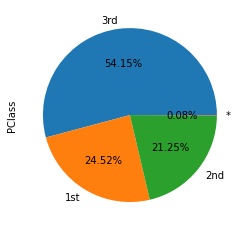

In [4]:
# we use the autopct parameter to define the format of the percentage displayed in the wedges of the pie 

titanic_df['PClass'].value_counts().plot(kind='pie', autopct='{:.2f}%'.format) 

plt.show() # necessary in Python scripts, but actually redundnt in Jupyter notebook 

Practice below: can you visualise the sex column in the data, and show the proportion of male vs female passengers on the Titanic? Edit the code as needed and then run.  

<AxesSubplot:ylabel='Sex'>

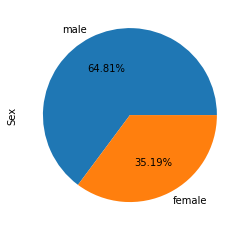

In [5]:
titanic_df['Sex'].value_counts().plot(kind='pie', autopct='{:.2f}%'.format)

Finally let’s see what proportion of the passengers survived by creating a pie graph for the column survived. Note that in the data, 1 denotes a survivor. Run the code below.  

<AxesSubplot:ylabel='Survived'>

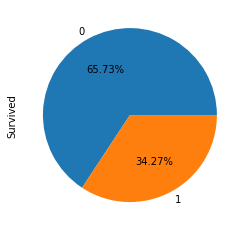

In [6]:
titanic_df['Survived'].value_counts().plot(kind='pie', autopct='{:.2f}%'.format) 

# 3 Histograms  <a name="3-Histograms"></a>

Let’s now think about how we can represent ranges of values in the Titanic dataset. The age of the passengers range from 0.17 to 80 years.  
We want to visualise the Age column as a histogram. Note in this example we have 

* **Added a title** using [`plt.title`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)
* **Added a label to the x axis** using [`plt.xlabel`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) 
* **Turned on grid lines** using [`plt.grid`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) 

Run the code below. 

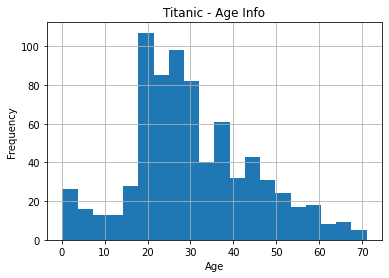

In [7]:
titanic_df['Age'].plot(kind='hist', bins=20) # bins indicates number of bins (ranges) in the histogram 

plt.title('Titanic - Age Info') # sets the title (on the "current" plot) 

plt.xlabel('Age') # sets the label of the horizontal axis 

plt.grid() # turns on the grid lines

What do you think `bins = 20` means?

> A bin in a histogram is the number of buckets that you use to combine values before getting the frequency. In this example, `bins = 20` means `20` different ranges of age.

# 4 Density plots <a name="4-Density-plots"></a>

Let’s compare how the age data we’ve just visualised as a histogram looks at a density plot instead. Note we have also specified a label for the x axis, and asked for gridlines. 

Text(0.5, 0, 'Age')

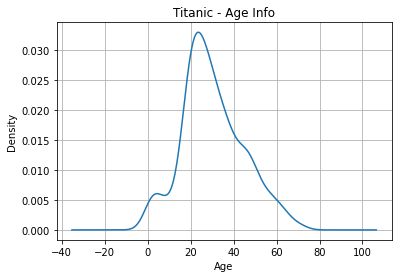

In [8]:
# just need to change the kind parameter to density or kde 
# note that we can also pass the title and grid parameters to the plot method 

titanic_df['Age'].plot(kind='density', grid=True, title='Titanic - Age Info') 

plt.xlabel('Age') 

Consider how the density plot compares to the histogram: what is the advantage of the density plot over the histogram? 

> An advantage that density plots have over histograms is that the shape of the graph does not become distorted by the use of bins. This can give us a better estimate of the real distribution of a variable

# 5 Box Plot <a name="5-Box-plot"></a>

Let’s see a summary of some of the Titanic data using a box plot. 

Perhaps we want to see the distribution of passenger age by those that survived the Titantic (and those that didn’t). We could use the [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method again with the parameter `kind='box'`, but this time it might be more convenient to use the [`DataFrame.boxplot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) method instead, and its `by` parameter to indicate the column we want to group by. Run the code below.


<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

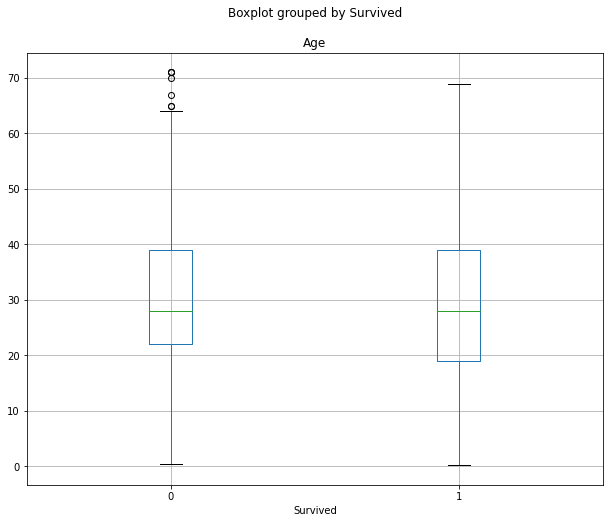

In [9]:
# the figsize parameter is used to indicate the size of the figure (width, height) in inches  

titanic_df.boxplot(column='Age', by='Survived', figsize=(10,8)) 

Look at the boxplots. Can you make any observations? 

> In the boxplots that represent the ages distribution we see that among the survivors the ages are generally slightly lower, implying that among the survivors the ratio of children was slightly higher than among the perished. In the boxplots that represent the fare distributions the differences are more obvious, among the survivors the median and 75th percentile are much higher, compared to the passengers that didn’t survive, implying that among the perished the ratio of wealthy people was lower. 

# 6 Scatterplot <a name="6-Scatterplot"></a>

Let’s now explore the relationships between different variables using the Iris dataset and a scatterplot. First load the iris dataset. Run the code below. 

In [10]:
iris_filename = "iris.data" 

iris_df = pd.read_csv(iris_filename,  

                   sep=',', # parameter to indicate the character used to separate columns in the data 

                   decimal=',', # parameter to indicate the character used as decimal point 

                   header=None, # indicates the header row in the data file (None in this case) 

                   names=['sepal_length', 'sepal_width',  

                          'petal_length', 'petal_width', 

                          'target']) # names used to indicate the names of the columns in the data 

iris_df 

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


For a scatterplot to work, we need to have numerical values. To find out more about the iris dataset, we can print the first 5 rows of the DataFrame using [`DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and then a short summary using [`DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). Run the code below. 

In [11]:
iris_df.head() # head will return first n rows, n=5 by default (unless a different argument is passed) 

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris_df.info() # prints a summary of a DataFrame (e.g. index dtype, columns, null values, and memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   target        150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


Note that all the columns are object data types, a special data type used in pandas to represent strings. Specifically, the length and width columns are not numeric (float or int) data types. So, we need to cast (convert) them to float before we can plot the scatterplot. Run the code below. 

## 6.1 Convert columns to numeric types <a name="6-1-Convert-columns"></a>

Obtain the numeric columns 

In [13]:
cols = iris_df.columns # iris_df.columns will return an array with all column names 

cols = cols.drop('target') # drop will drop the column target from the array 

cols 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Now casting the columns data types using the [`DataFrame.astype()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) method 

In [14]:
iris_df[cols] = iris_df[cols].astype(float) # cast to float and assign to the original object 

iris_df.dtypes # return the dtype for all columns 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target           object
dtype: object

## 6.2 Introducing seaborn <a name="6-2-Introducing-seaborn"></a>

We could use the `DataFrame.plot()` method with `kind='scatter'`, but instead let’s introduce another popular Python visualisation library that makes plotting beautiful graphs even easier, the [seaborn](https://seaborn.pydata.org/) library. First, we’ll install the module (if it’s not already installed), and then import the seaborn module and assign it the alias sns. Run the code below.

In [15]:
!pip3.7 install seaborn -U # this will install and update the seaborn package if needed 

Keyring is skipped due to an exception: 'keyring.backends'
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 293 kB 9.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.


In [16]:
import seaborn as sns # imports the seaborn package 

Now we are ready to use the seaborn library in our code, to create a scatter plot we will use the function [`seaborn.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Run the code below. 

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

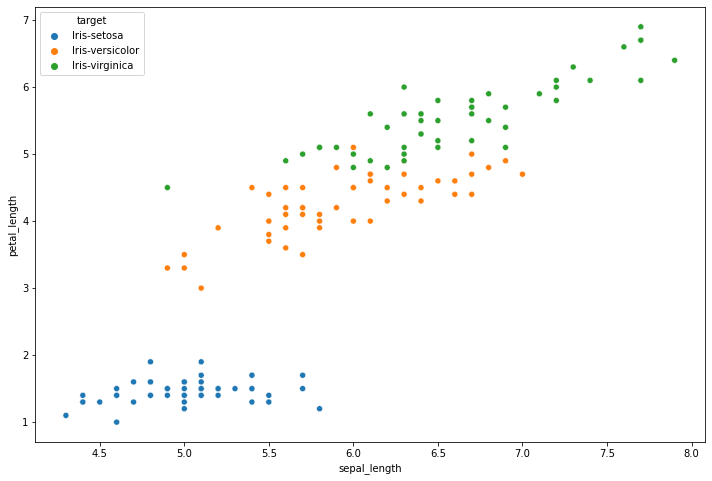

In [17]:
plt.figure(figsize=(12,8)) # create a new empty figure, and define its size 

# x and y are the column names to use, hue is a grouping variable that will produce points with different colors. In this case hue has three groups: the 'target' groups.

sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='target') 

## 6.3 Personalising your plots <a name="6-3-Personalising-your-plots"></a>

Sometimes we may want to control the colours of the groups. Seaborn is built on top of matplotlib, so specifying a colour is identical in both libraries. For a full guide about specifying colours you can read the [tutorial in matplotlib](https://matplotlib.org/stable/tutorials/colors/colors.html). 

Let’s modify some of the parameters in the scatter plot using the [`seaborn.set_theme()`](https://seaborn.pydata.org/generated/seaborn.set_theme.html) function to set some aspects of the visual theme. This will affect both matplotlib and seaborn plots. Run the code below to see the result.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

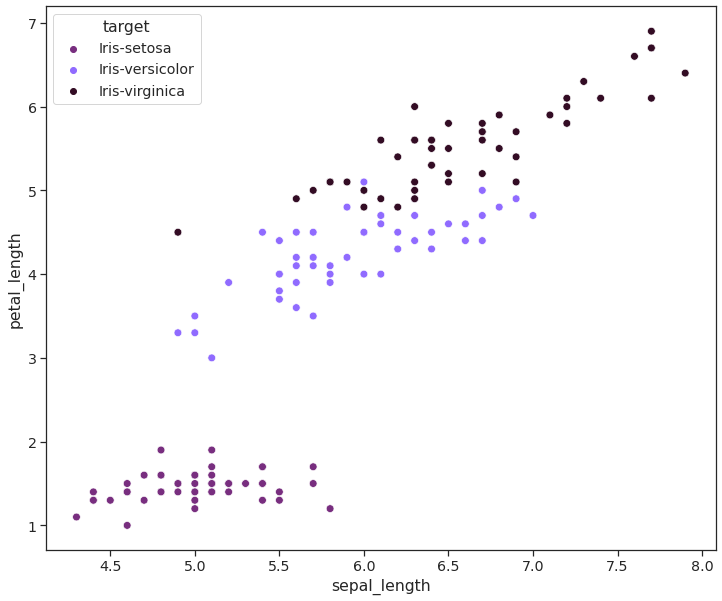

In [18]:
plt.figure(figsize=(12,10)) 

colors = ['#782e7f','#906bff', '#330c24'] # define a list of 3 colors using hex RGB format 

sns.set_theme(style="ticks", font_scale=1.3) # define the axes style and font scale in the visual theme 

# the parameter s indicates the markers size, and palette is used to define the colors of the markers

sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='target', s=60, palette=colors) 

# 7 Hexbins <a name="7-Hexbins"></a>

Similar to scatterplots we can use a hexagon binning plot to visualise the density of points in different areas.This can help to reveal natural clusters hidden in your data by using some of the variables in the dataset. 

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

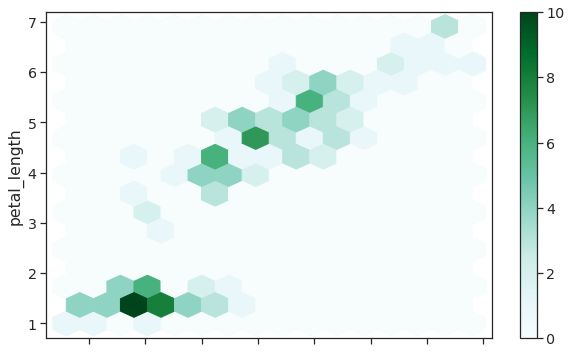

In [19]:
# the gridsize parameter indicates the number of hexagons 

iris_df.plot(kind='hexbin', x='sepal_length', y='petal_length', gridsize=15, figsize=(10,6)) 

# 8 Scatter matrix <a name="8-Scatter-matrix"></a>

Also known as a Pairs plot, Scatterplots are bivariate meaning they involve two variables. So, you'll require a single plot for every pair of variables. 

To generate a pairs plot using the [`seaborn.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function run the code below. 

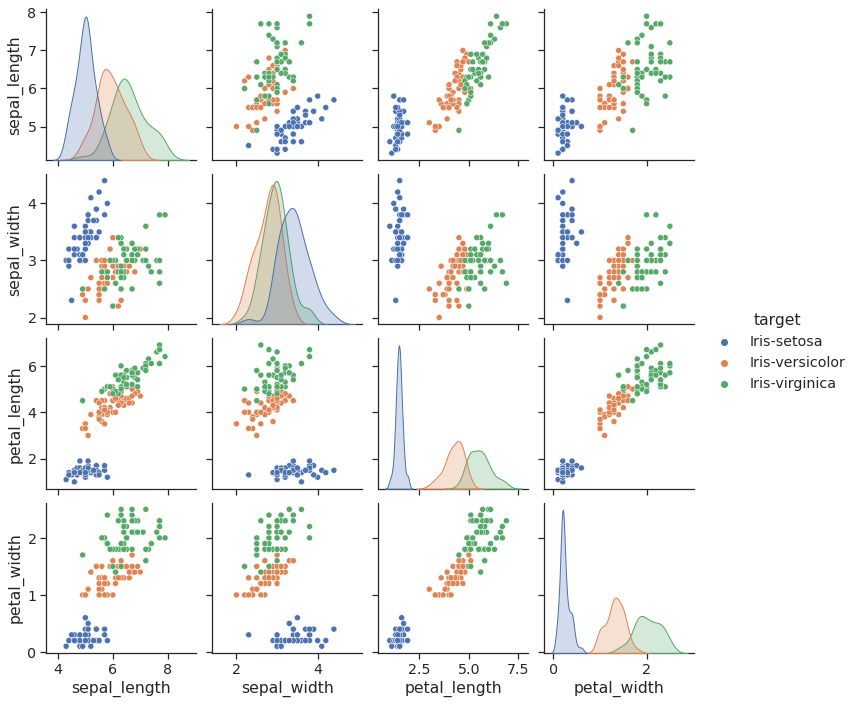

In [20]:
sns.pairplot(data=iris_df, hue='target') 

<div class="warning" style='padding:0.1em; background-color:#e6ffff'>
<span>
<p style='margin:1em;'>
<b>Congratulations!</b></p>
<p style='margin:1em;'>
You’ve now completed this activity which will help you to prepare your visualisations for assessment. To revise this activity, return to the Canvas page and read over the content under “What you’ll learn”.
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>